# Sequence Data in Pytorch

In [26]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Generating time series data

#### create x, y data

In [27]:
x = np.linspace(1, 100, 100)
y = 1.5 * np.sin(x)

#### plot x, y data

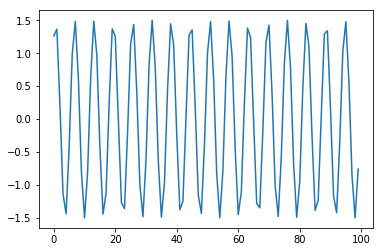

In [28]:
plt.plot(y)

#### package data into sequences

In [29]:
k = 10
inputs = []
target = []
for i in range(0, len(y)-k):
    inputs.append(y[i:i+k].reshape(k, 1))
    target.append([y[i+k]])
inputs = torch.tensor(inputs, dtype=torch.float)
target = torch.tensor(target, dtype=torch.float)
print(inputs[1])
print(target[0])
print(inputs.shape)
print(target.shape)

tensor([[ 1.3639],
        [ 0.2117],
        [-1.1352],
        [-1.4384],
        [-0.4191],
        [ 0.9855],
        [ 1.4840],
        [ 0.6182],
        [-0.8160],
        [-1.5000]])
tensor([-1.5000])
torch.Size([90, 10, 1])
torch.Size([90, 1])


## RNNs

In [38]:
rnn = nn.RNN(input_size=1, hidden_size=10, num_layers=1, batch_first=True)

In [40]:
out, hn = rnn(inputs)
print(out.shape, hn.shape)

torch.Size([90, 10, 10]) torch.Size([1, 90, 10])


## LSTMs

In [30]:
lstm = nn.LSTM(input_size=1, hidden_size=10, num_layers=1, batch_first=True)

In [34]:
out, (hn, cn) = lstm(inputs)
print(out.shape, (hn.shape, cn.shape))

torch.Size([90, 10, 10]) (torch.Size([1, 90, 10]), torch.Size([1, 90, 10]))
